# Analysis

In [1]:
#load necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as mplcm
import pandas as pd
from calendar import IllegalMonthError,IllegalWeekdayError
from dateutil.parser import parse
from unidecode import unidecode
from itertools import cycle
import os

if not os.path.exists('ImagesPaper'):
    os.makedirs('ImagesPaper')

def remove_excessive_ws(x):
    if isinstance(x,str):
        return ' '.join(x.split())
    else:
        return x
    

def myunidecode(x):
    if isinstance(x,str):
        return unidecode(x)
    else:
        return x

def remove_short(x):
    if isinstance(x,str):
        tmp = x.split()
        return ' '.join([_x for _x in tmp if len(_x)>2])
    else:
        return x


def plot_ts_cat(colname='DEPARTAMENTO',resampleby='M',thresh= 10,dataset='social',custom_colors = True,linecycle=False):
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines)
    if dataset == 'all':
        dat = data_all
    if dataset == 'social':
        dat = data_social
    vals = dat[colname].unique()
    newvals = []
    for i,val in enumerate(vals):
        tmp = dat[dat[colname] == val].Deaths.resample(resampleby).sum()
        if sum(tmp>thresh)>0:
            newvals.append(val)
    if custom_colors:
        if isinstance(custom_colors,list):
            mycolors = custom_colors
        else:
            NUM_COLORS = len(newvals)

            cm = plt.get_cmap('gist_rainbow')
            cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
            scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
            mycolors = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]
    for i,val in enumerate(newvals):
        tmp = dat[dat[colname] == val].Deaths.resample(resampleby).sum()
        if custom_colors:
            if linecycle:
                tmp.plot(label=val,legend=True,color=mycolors[i],linewidth=3,style = next(linecycler))
            else:
                tmp.plot(label=val,legend=True,color=mycolors[i],linewidth=3)
        else:
            if linecycle:
                tmp.plot(label=val,legend=True,linewidth=3,style = next(linecycler))
            else:
                tmp.plot(label=val,legend=True,color=mycolors[i],linewidth=3)
            
    lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=14)
    return lgd



In [2]:
import matplotlib
%matplotlib inline
plt.style.use('seaborn-whitegrid')
# other options:
# tableau-colorblind10,seaborn-whitegrid,seaborn-paper,seaborn-muted,seaborn-poster

matplotlib.rcParams.update({'font.size': 16})
COLORCYCLE = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [114]:
data_social = pd.read_pickle('Data/data_social.pkl')
data_all= pd.read_pickle('Data/data_all.pkl')

In [115]:
# rename date column
data_all.rename(columns={u'FECHA': u'Date'}, inplace=True)
# Set index to date
data_all.index = data_all['Date']
data_social.index = data_social['Date']

# Create column to simplify aggregation and resampling
data_all['Deaths'] = [1.0]*data_all.shape[0]
data_social['Deaths'] = [1.0]*data_social.shape[0]

# Gender stats

### Homicide data

In [17]:
print(data_all['SEXO'].value_counts())
print ('\npercentages:')
print(data_all['SEXO'].value_counts(normalize=True))

MASCULINO     62109
FEMENINO       5725
NO REPORTA       14
Name: SEXO, dtype: int64

percentages:
MASCULINO     0.915414
FEMENINO      0.084380
NO REPORTA    0.000206
Name: SEXO, dtype: float64


### Social leader data

In [18]:
print(data_social['SEXO'].value_counts())
print ('\npercentages:')
print(data_social['SEXO'].value_counts(normalize=True))

MASCULINO    290
FEMENINO      49
LGTBI         18
Name: SEXO, dtype: int64

percentages:
MASCULINO    0.812325
FEMENINO     0.137255
LGTBI        0.050420
Name: SEXO, dtype: float64


## Bar plots of gender in Social Leaders data

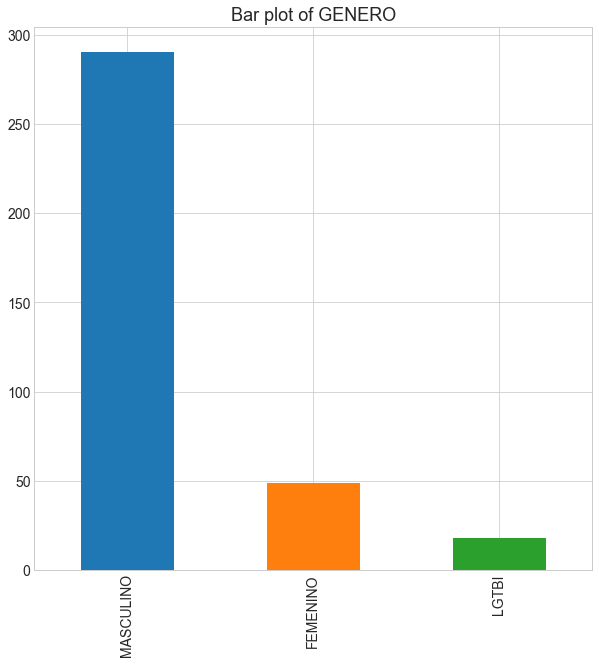

In [19]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn-whitegrid')
counts = data_social[u'SEXO'].value_counts()
counts.plot(kind='bar')
plt.title('Bar plot of GENERO',fontsize=18)
plt.tick_params(labelsize=14)
#plt.savefig('ImagesPaper/bar_gender.png')
plt.show()

## Type of weapon used




### Homicide data

In [21]:
print(data_all['ARMA EMPLEADA'].value_counts())
print ('\npercentages:')
print(data_all['ARMA EMPLEADA'].value_counts(normalize=True))

ARMA FUEGO                      59643
ARMA BLANCA                     16663
CONTUNDENTES                     2601
EXPLOSIVO                         621
CUERDA/SOGA/CADENA                316
BOLSA PLASTICA                    129
REPORTADO                          87
GASOLINA                           44
SIN EMPLEO ARMAS                   36
VENENO                             27
CINTAS/CINTURON                    27
ALMOHADA                           27
SUSTANCIAS TOXICAS                 15
COMBUSTIBLE                        15
ARTEFACTO INCENDIARIO               9
CINTAS                              8
ACIDO                               4
PRENDAS VESTIR                      4
QUIMICOS                            3
ESCOPOLAMINA                        2
ROCKET                              1
MEDICAMENTOS                        1
POLVORA(FUEGOS PIROTECNICOS)        1
LIQUIDOS                            1
JERINGA                             1
GASES                               1
Name: ARMA E

### Social leader data

In [22]:
print(data_social['ARMA EMPLEADA'].value_counts())
print ('\npercentages:')
print(data_social['ARMA EMPLEADA'].value_counts(normalize=True))

ARMA FUEGO              327
ARMA BLANCA              16
OBJETO CONTUNDENTE        3
POR DETERMINAR            2
ARMA FUEGO (TORTURA)      2
VEHICULO                  1
CUERDA/SOGA/CADENA        1
CORTOCONTUNDENTE          1
Name: ARMA EMPLEADA, dtype: int64

percentages:
ARMA FUEGO              0.926346
ARMA BLANCA             0.045326
OBJETO CONTUNDENTE      0.008499
POR DETERMINAR          0.005666
ARMA FUEGO (TORTURA)    0.005666
VEHICULO                0.002833
CUERDA/SOGA/CADENA      0.002833
CORTOCONTUNDENTE        0.002833
Name: ARMA EMPLEADA, dtype: float64


### bar plot

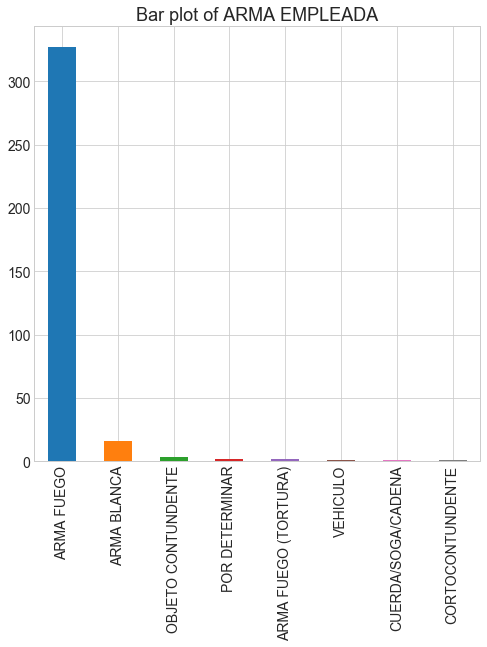

In [159]:
counts = data_social[u'ARMA EMPLEADA'].value_counts()
plt.figure(figsize=(8,8))
counts.plot(kind='bar')
plt.title('Bar plot of ARMA EMPLEADA',fontsize=18)
plt.tick_params(labelsize=14)
plt.savefig('ImagesPaper/bar_arma.png')
plt.show()

# Counts by department

In [163]:
#get social leader data dictionary of counts
sl_counts = data_social[u'DEPARTAMENTO'].value_counts().to_dict()
# add Bogota DC to Cundinamarca to make consistent with official police homicide data
sl_counts['CUNDINAMARCA']+=sl_counts['BOGOTA D.C.']
del sl_counts['BOGOTA D.C.']

#get homicide data dictionary of counts
all_counts = data_all[u'DEPARTAMENTO'].value_counts().to_dict()
for key,value in all_counts.items():
    if key in sl_counts:
        all_counts[key]=(value,sl_counts[key])
    else:
        all_counts[key]=(all_counts[key],0)
        
all_counts['SAN ANDRES']=all_counts.pop('ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA')

all_counts[key]        
tmpdf = pd.DataFrame.from_dict(all_counts,orient='index')
tmpdf.columns = ['homicides (left)','social leader killings']

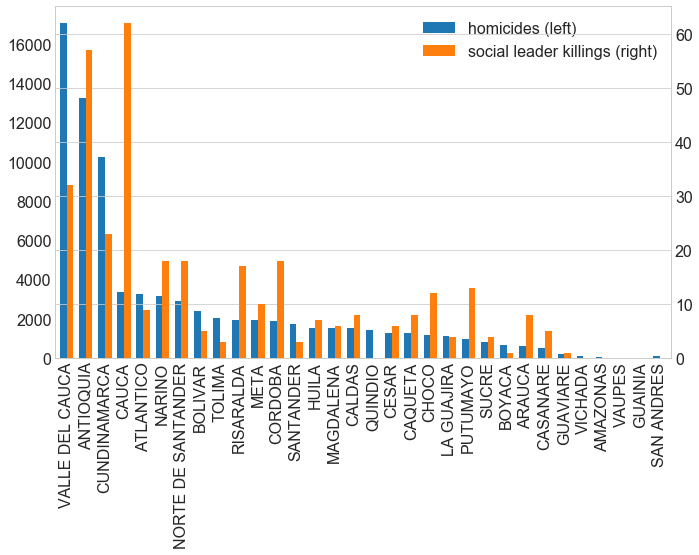

In [164]:
tmpdf.plot(kind='bar',secondary_y='social leader killings',figsize=(10,8), width=0.7,rot=90)
plt.tight_layout()
plt.savefig('ImagesPaper/bar_department.png')
plt.show()

## Type of organization social leaders belonged to

In [30]:
counts = data_social[u'TIPO DE ORGANIZACION'].value_counts()
counts

COMUNAL                     136
INDIGENA                     82
CAMPESINO                    29
SINDICAL                     21
LGTBI                        18
VICTIMAS                     14
AFRO                         13
RESTITUCION TIERRAS           9
DD.HH.                        7
JUVENIL                       6
POLITICO                      5
CULTURAL                      5
SOCIAL                        3
MINERO                        2
AMBIENTALISTA                 1
LIDER                         1
ADMINISTRACION MUNICIPAL      1
SOCIAL / PERIODISTA           1
ACTIVISTA                     1
Name: TIPO DE ORGANIZACION, dtype: int64

# Plotting SL and homicide data overall yearly counts

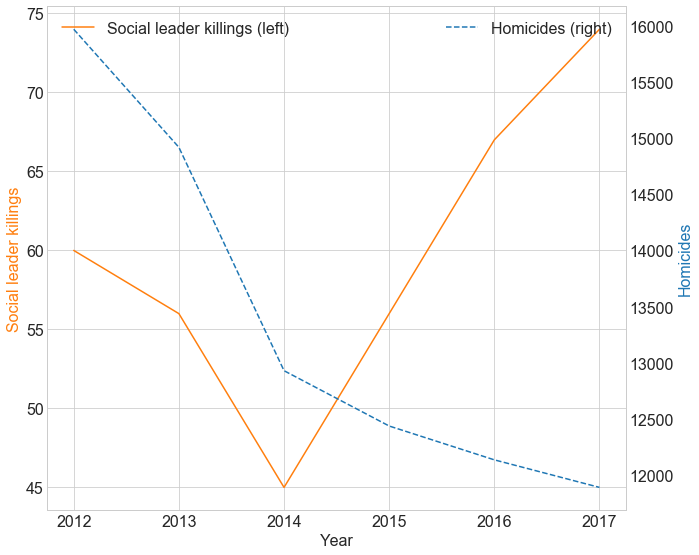

In [174]:
newdf = pd.concat([data_social['Deaths'].resample('A').sum(), data_all['Deaths'].resample('A').sum()],axis=1)
newdf.columns = ['social leaders (left)','homicides (right)']
fig, ax1 = plt.subplots(figsize=(10,8))

ax2 = ax1.twinx()

newdf['homicides (right)'].plot(ax=ax2,color=COLORCYCLE[0],style='--',label = 'Homicides (right)')
newdf['social leaders (left)'].plot(ax=ax1,color=COLORCYCLE[1],style='-',label = 'Social leader killings (left)')#style='r-'

ax1.set_xlabel('Year')
ax1.set_ylabel('Social leader killings', color=COLORCYCLE[1])
ax2.set_ylabel('Homicides', color=COLORCYCLE[0])
ax2.legend(loc=0)
ax1.legend()
plt.grid()
plt.tight_layout()
plt.savefig('ImagesPaper/Social_vs_all_twin.png')
plt.show()

### Evolucion de anyo y quarto

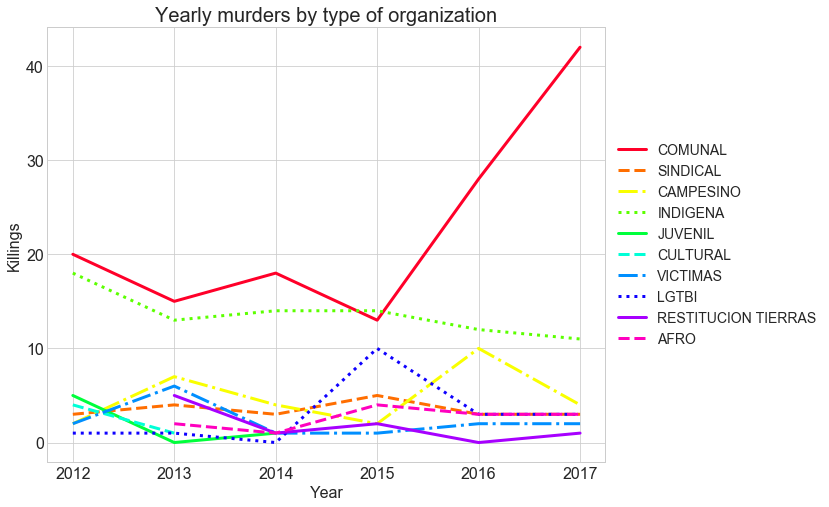

In [186]:
plt.figure(figsize=(10,8))
plt.title('Yearly murders by type of organization',fontsize=20)
lgd = plot_ts_cat(colname=u'TIPO DE ORGANIZACION',resampleby='A',thresh= 3.0,custom_colors=True,linecycle=True)
#tmpdf = plot_ts_cat_data(colname=u'TIPO DE ORGANIZACION',resampleby='A',thresh= 3.0,custom_colors=False)
#tmpdf.to_csv('PlotData/time_year_tipoorg.csv')
plt.tick_params(labelsize=16)
plt.ylabel('Killings',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.savefig('ImagesPaper/time_year_tipoorg.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

# Breaking down the COMUNAL category
A look at the organization names reveals that a large number of comunal leaders are JAC

## prepare new column names

In [196]:
# Manual cleaning of one misspelling 
searchlist = ['JUNTA D EQACCION COUMUNAL']
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlist))==True,'ORGANIZACION A LA QUE PERTENECE'] = 'PRESIDENTE JUNTA DE ACCION COMUNAL VEREDA BUENOS AIRES, FILIAL SINDICATO DE TRABAJADORES  DE L CORDON FRONTERIZO DE PUTUMAYO- CORREDOR  PUERTO VEGA- TETEYE Y MIEMBRO DE MARCHA PATRIOTICA '

In [204]:
#searchlist = ['JAC,','JAC.','JAC ','JUNTA DE ACCION COMUNAL','CONSEJO COMUNAL','CONSEJO COMUNITARIO','ASOCIACION COMUNITARIA','ASOCOMUNAL','JAL ']
searchlist = ['JAC,','JAC.','JAC ','JUNTA DE ACCION COMUNAL','JUNTAS DE ACCION COMUNAL','CONSEJO COMUNITARIO','JAL ']
data_social['JAC/JAL/CC']=0
data_social.loc[data_social['NOMBRE DE LA ORGANIZACION'].str.contains('|'.join(searchlist))==True,'JAC/JAL/CC']=1
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlist))==True,'JAC/JAL/CC']=1

searchlistJAC = ['JAC,','JAC.','JAC ','JUNTA DE ACCION COMUNAL','JUNTAS DE ACCION COMUNAL']
data_social['JAC']=0
data_social.loc[data_social['NOMBRE DE LA ORGANIZACION'].str.contains('|'.join(searchlistJAC))==True,'JAC']=1
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlistJAC))==True,'JAC']=1

searchlistJAL = ['JAL ']
data_social['JAL']=0
data_social.loc[data_social['NOMBRE DE LA ORGANIZACION'].str.contains('|'.join(searchlistJAL))==True,'JAL']=1
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlistJAL))==True,'JAL']=1

searchlistJAL = ['CONSEJO COMUNITARIO']
data_social['CC']=0
data_social.loc[data_social['NOMBRE DE LA ORGANIZACION'].str.contains('|'.join(searchlistJAL))==True,'CC']=1
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlistJAL))==True,'CC']=1
# create data frame of comunal category only 
dfcomunal = data_social[data_social['TIPO DE ORGANIZACION']=='COMUNAL']

## plotting JAC, COMUNAL, etc

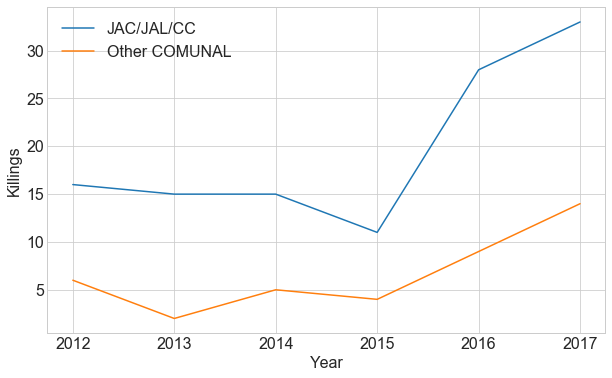

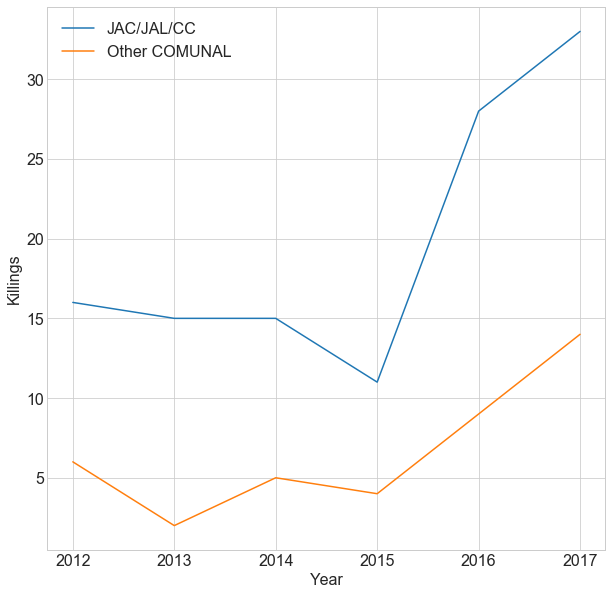

In [206]:
plt.figure(figsize=(10,6))
data_social[data_social['JAC/JAL/CC']==1]['Deaths'].resample('A').sum().plot(label='JAC/JAL/CC')
dfcomunal[dfcomunal['JAC/JAL/CC']==0]['Deaths'].resample('A').sum().plot(label='Other COMUNAL')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Killings')
plt.savefig('ImagesPaper/JACJALCC_vs_ComunalOtra.png')
plt.show()

plt.figure(figsize=(10,10))
data_social[data_social['JAC/JAL/CC']==1]['Deaths'].resample('A').sum().plot(label='JAC/JAL/CC')
dfcomunal[dfcomunal['JAC/JAL/CC']==0]['Deaths'].resample('A').sum().plot(label='Other COMUNAL')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Killings')
plt.savefig('ImagesPaper/JACJALCC_vs_ComunalOtraSQUARE.png')
plt.show()

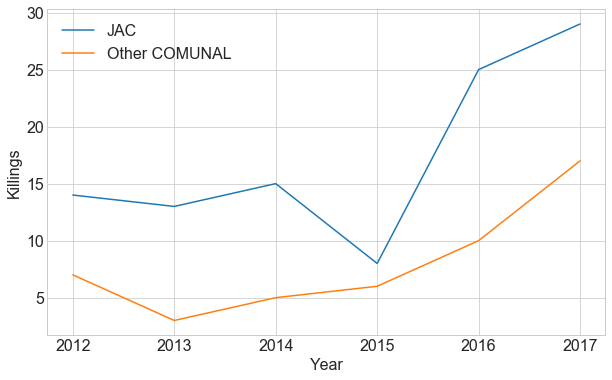

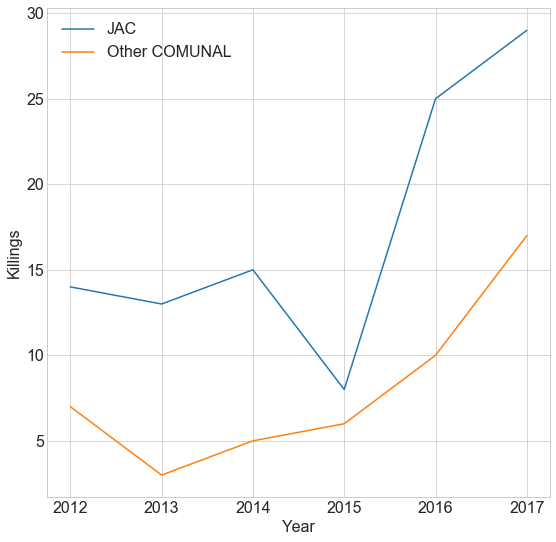

In [207]:
plt.figure(figsize=(10,6))
data_social[data_social['JAC']==1]['Deaths'].resample('A').sum().plot(label='JAC')
dfcomunal[dfcomunal['JAC']==0]['Deaths'].resample('A').sum().plot(label='Other COMUNAL')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Killings')
plt.savefig('ImagesPaper/JAC_vs_ComunalOtra.png')
plt.show()

plt.figure(figsize=(9,9))
data_social[data_social['JAC']==1]['Deaths'].resample('A').sum().plot(label='JAC')
dfcomunal[dfcomunal['JAC']==0]['Deaths'].resample('A').sum().plot(label='Other COMUNAL')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Killings')
plt.savefig('ImagesPaper/JAC_vs_ComunalOtraSQUARE.png')
plt.show()

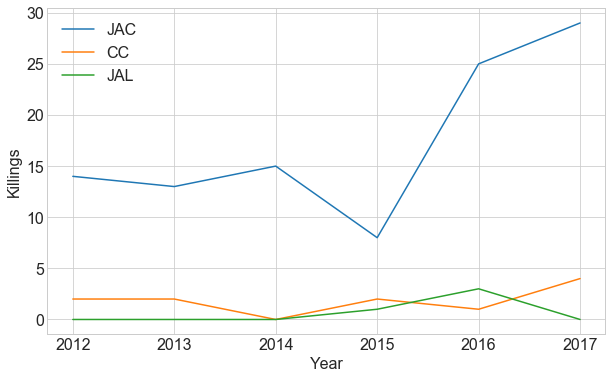

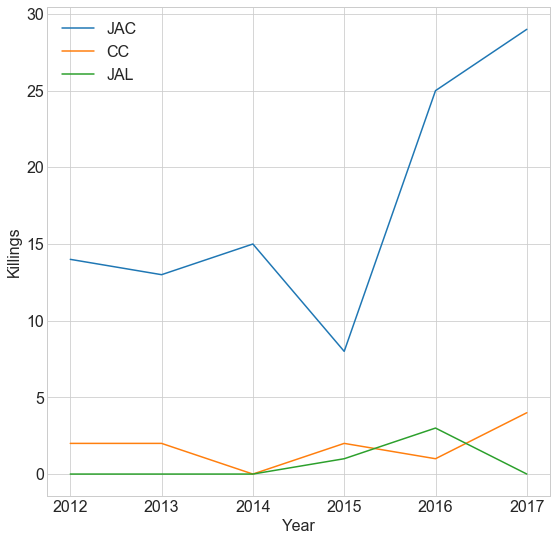

In [208]:
df1 = data_social[data_social['JAC']==1]['Deaths'].resample('A').sum()
df2 = data_social[data_social['CC']==1]['Deaths'].resample('A').sum()
df3 = data_social[data_social['JAL']==1]['Deaths'].resample('A').sum()
tmpdf = pd.concat((df1,df2,df3),axis=1)
tmpdf.fillna(0,inplace=True)
tmpdf.columns = ['JAC','CC','JAL']

tmpdf.plot(figsize=(10,6))
plt.legend()
plt.xlabel('Year')
plt.ylabel('Killings')
plt.savefig('ImagesPaper/JAC_JAL_CC_time.png')
plt.show()


tmpdf.plot(figsize=(9,9))
plt.legend()
plt.xlabel('Year')
plt.ylabel('Killings')
plt.savefig('ImagesPaper/JAC_JAL_CC_timeSQUARE.png')
plt.show()

JAC    104
CC      11
JAL      4
dtype: int64


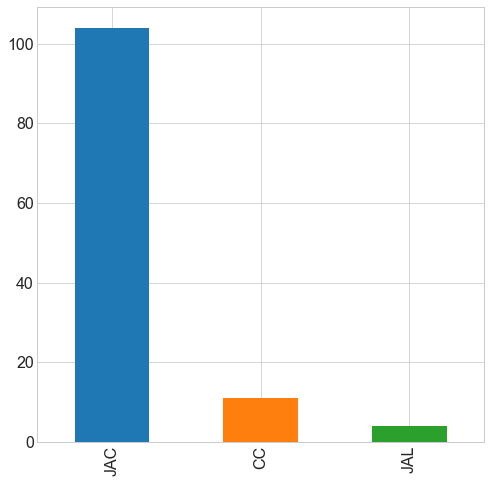

In [205]:
counts = data_social[['JAC','CC','JAL']].sum(0)
print(counts)
plt.figure(figsize=(8,8))
counts.plot(kind='bar')
plt.savefig('ImagesPaper/JAC_JAL_CC_bar.png')
plt.show()

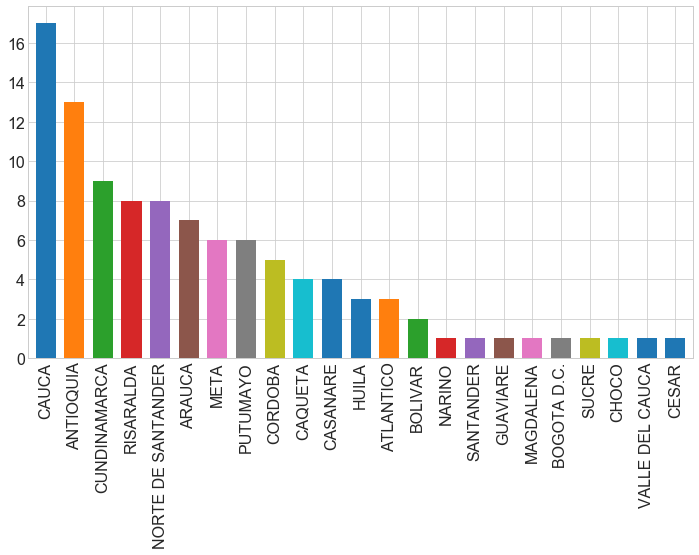

In [225]:
tmpdf = data_social[data_social['JAC']==1].DEPARTAMENTO.value_counts()
tmpdf.plot(kind='bar',figsize=(10,8), width=0.7,rot=90)
plt.tight_layout()
plt.savefig('ImagesPaper/bar_JAC_department.png')
plt.show()

# prepare CSV to load data into R to create map

In [355]:
depto_to_id = {}
with open('data/depto_to_id.csv','r') as f:
    for line in f:
        tup = line.strip().split(';')
        depto_to_id[tup[0]] = tup[1]
depto_to_id['BOGOTA D.C.'] = depto_to_id['BOGOTA, D. C.'] 

In [367]:
data_jac = pd.DataFrame(data_social[data_social['JAC']==1])
#jac_depto = pd.DataFrame(data_jac.DEPARTAMENTO.value_counts(),dtype=str)
countdict = data_jac.DEPARTAMENTO.value_counts().to_dict()
for key,_ in depto_to_id.items():
    if not key in countdict:
        countdict[key]=0
jac_depto = pd.DataFrame.from_dict(countdict,orient='index')
jac_depto['iddepto'] = [depto_to_id[val] for val in jac_depto.index]
jac_depto.columns = ['JAC_killings', 'iddepto']
jac_depto.to_csv('data/jac_depto_plot.csv')



In [404]:
jac_depto

,JAC_killings,iddepto
CAUCA,17,19
ANTIOQUIA,13,05
CUNDINAMARCA,9,25
RISARALDA,8,66
NORTE DE SANTANDER,8,54
ARAUCA,7,81
META,6,50
PUTUMAYO,6,86
CORDOBA,5,23
CAQUETA,4,18


## Departments with JAC killings in last quarter

In [396]:
data_jac[data_jac.index > '2017-10-1'].DEPARTAMENTO.value_counts()

NORTE DE SANTANDER    4
ANTIOQUIA             2
CAUCA                 2
CAQUETA               1
NARINO                1
Name: DEPARTAMENTO, dtype: int64

#### all of 2017 JAC killings:

In [397]:
data_jac[data_jac.index > '2017-1-1'].DEPARTAMENTO.value_counts()

NORTE DE SANTANDER    4
ANTIOQUIA             4
CAUCA                 4
RISARALDA             3
PUTUMAYO              2
CAQUETA               2
META                  2
ATLANTICO             1
SUCRE                 1
GUAVIARE              1
BOLIVAR               1
NARINO                1
CESAR                 1
CORDOBA               1
VALLE DEL CAUCA       1
Name: DEPARTAMENTO, dtype: int64

# JAC gender

In [401]:
print(data_jac.SEXO.value_counts())
print(data_jac.SEXO.value_counts(normalize=True))

MASCULINO    84
FEMENINO     20
Name: SEXO, dtype: int64
MASCULINO    0.807692
FEMENINO     0.192308
Name: SEXO, dtype: float64


In [402]:
print(data_all.SEXO.value_counts())
print(data_all.SEXO.value_counts(normalize=True))

MASCULINO     62109
FEMENINO       5725
NO REPORTA       14
Name: SEXO, dtype: int64
MASCULINO     0.915414
FEMENINO      0.084380
NO REPORTA    0.000206
Name: SEXO, dtype: float64


In [403]:
print(data_social.SEXO.value_counts())
print(data_social.SEXO.value_counts(normalize=True))

MASCULINO    290
FEMENINO      49
LGTBI         18
Name: SEXO, dtype: int64
MASCULINO    0.812325
FEMENINO     0.137255
LGTBI        0.050420
Name: SEXO, dtype: float64


# JAC Municipio counts

In [393]:
grouped_counts = data_jac[['MUNICIPIO','DEPARTAMENTO']].groupby(["MUNICIPIO", "DEPARTAMENTO"]).size()
grouped_counts.sort_values(ascending=False)

MUNICIPIO              DEPARTAMENTO      
BOGOTA D.C.            CUNDINAMARCA          7
EL TAMBO               CAUCA                 4
PUERTO ASIS            PUTUMAYO              4
TIBU                   NORTE DE SANTANDER    3
FORTUL                 ARAUCA                3
CUCUTA                 NORTE DE SANTANDER    3
ARAUCA                 ARAUCA                3
YOPAL                  CASANARE              2
MEDELLIN               ANTIOQUIA             2
NEIVA                  HUILA                 2
PEREIRA                RISARALDA             2
ITUANGO                ANTIOQUIA             2
PUERTO LIBERTADOR      CORDOBA               2
CARTAGENA              BOLIVAR               2
SANTUARIO              RISARALDA             2
SOACHA                 CUNDINAMARCA          2
GALAPA                 ATLANTICO             1
ALMAGUER               CAUCA                 1
FLORENCIA              CAQUETA               1
ANORI                  ANTIOQUIA             1
APARTADO          

## What are the organization names and roles in the organization that do not fall into the JAC/CC/JAL category?

In [370]:
for row in dfcomunal[dfcomunal['JAC/JAL/CC']==0][['NOMBRE DE LA ORGANIZACION','ORGANIZACION A LA QUE PERTENECE']].iterrows():
    print (row[1][0])
    print('*'*20)

ASOCOMUNAL
********************
SINTRAOFAN
********************
BELLA FLOR
********************
nan
********************
NO REPORTA
********************
ASOCAMPROV-LIBERTAD
********************
PROCESO ORGANIZATIVO CENTRO COMUNITARIO CEPIA
********************
nan
********************
ASOCIACION COMUNITARIA CEJAID
********************
LIGA DE USUARIOS EL PUEBLO
********************
NASA
********************
ASOCIACION DE VIVIENDA
********************
ANUC
********************
nan
********************
nan
********************
nan
********************
nan
********************
COMUNIDAD BAJO QUEBRADON DE ALGECIRAS
********************
CONSEJO CIENAGA DE ORO
********************
RED JUVENIL DE SOACHA Y JUCO
********************
CONAFRO
********************
nan
********************
ASOCIACION DE HERMANDADES AGROECOLOGICOS Y MINEROS
********************
nan
********************
EMPRESA COMUNITARIA UNIDAD DE PAZ, LIBERTAD Y TRABAJO
********************
JUVENTUDES LIBERALES
*******************